In [ ]:
# Import các thư viện cần thiết cho K-means clustering
# KMeans: thuật toán phân cụm K-means từ sklearn
# matplotlib.pyplot: thư viện vẽ biểu đồ
# pandas: thư viện xử lý dữ liệu dạng bảng
# StandardScaler: công cụ chuẩn hóa dữ liệu (z-score normalization)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
# Đọc dữ liệu khách hàng từ file CSV
# Dataset Mall_Customers chứa thông tin về khách hàng trong trung tâm thương mại
# bao gồm: CustomerID, Gender, Age, Annual Income, Spending Score
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
# Xem 5 dòng đầu tiên của dataset để hiểu cấu trúc dữ liệu
# Giúp ta biết các cột có sẵn và kiểu dữ liệu
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Lựa chọn đặc trưng để phân cụm
# Chọn 2 đặc trưng quan trọng: Thu nhập hàng năm và Điểm chi tiêu
# Đây là 2 yếu tố chính để phân loại khách hàng thành các nhóm khác nhau
# Thu nhập cao/thấp kết hợp với chi tiêu nhiều/ít tạo ra các segment khách hàng
selected_features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[selected_features]

In [ ]:
# Chuẩn hóa dữ liệu để các đặc trưng có cùng scale (z-score normalization)
# Lý do: Annual Income (0-150k) và Spending Score (1-100) có đơn vị khác nhau
# K-means sử dụng khoảng cách Euclidean, nên scale khác nhau sẽ làm méo kết quả
# StandardScaler biến đổi dữ liệu có mean=0, std=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Xem 5 mẫu đầu tiên sau khi chuẩn hóa
# Kiểm tra xem dữ liệu đã được chuẩn hóa đúng chưa
# Các giá trị sẽ xoay quanh 0, với độ lệch chuẩn khoảng 1
print(X_scaled[:5])

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


In [ ]:
# Thực hiện phân cụm K-means với k=5 cụm
# random_state=42: đảm bảo kết quả có thể tái tạo (reproducible)
# K-means sẽ tìm 5 centroid và gán mỗi điểm dữ liệu vào cụm gần nhất
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)    # training - tìm centroid tối ưu

# Inertia: tổng khoảng cách bình phương từ các điểm đến centroid của cụm
# Inertia càng nhỏ thì các điểm trong cụm càng gần nhau (cụm càng chặt)
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

Inertia: 65.56840815571681


In [ ]:
# Lấy kết quả phân cụm
# labels_: nhãn cụm cho mỗi điểm dữ liệu (0, 1, 2, 3, 4)
# cluster_centers_: tọa độ của các centroid (trung tâm cụm)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# In ra tọa độ các centroid (trong không gian đã chuẩn hóa)
print("Cluster centers:")
print(centers)

Cluster centers:
[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]


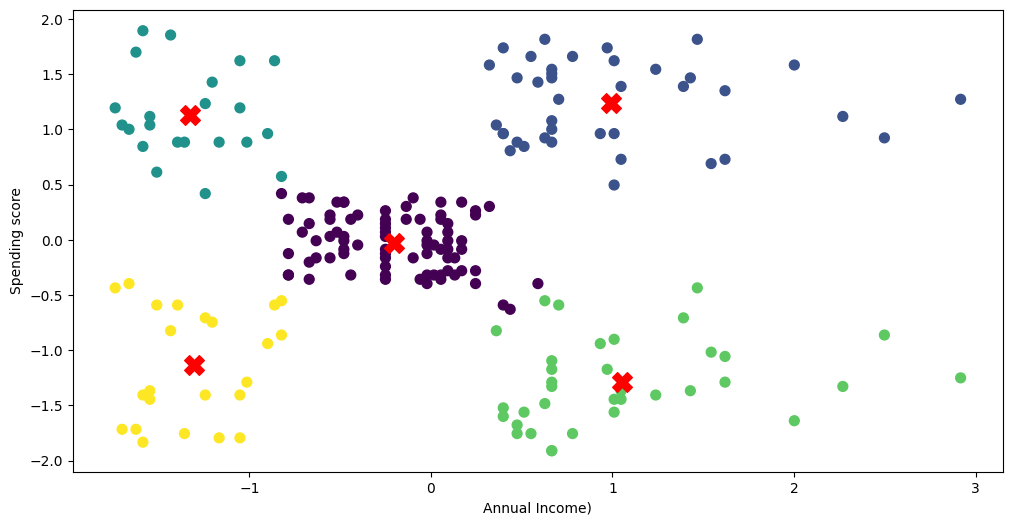

In [ ]:
# Visualize kết quả phân cụm trên dữ liệu đã chuẩn hóa
plt.figure(figsize=(12,6))

# Vẽ các điểm dữ liệu với màu sắc theo cụm
# c=labels: màu sắc theo nhãn cụm
# cmap='viridis': bảng màu viridis (xanh lam đến vàng)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o', s=50)

# Vẽ các centroid (trung tâm cụm)
# màu đỏ, hình X, kích thước lớn để dễ nhận biết
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200)

plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.title('K-means Clustering Results (Standardized Data)')
plt.show()

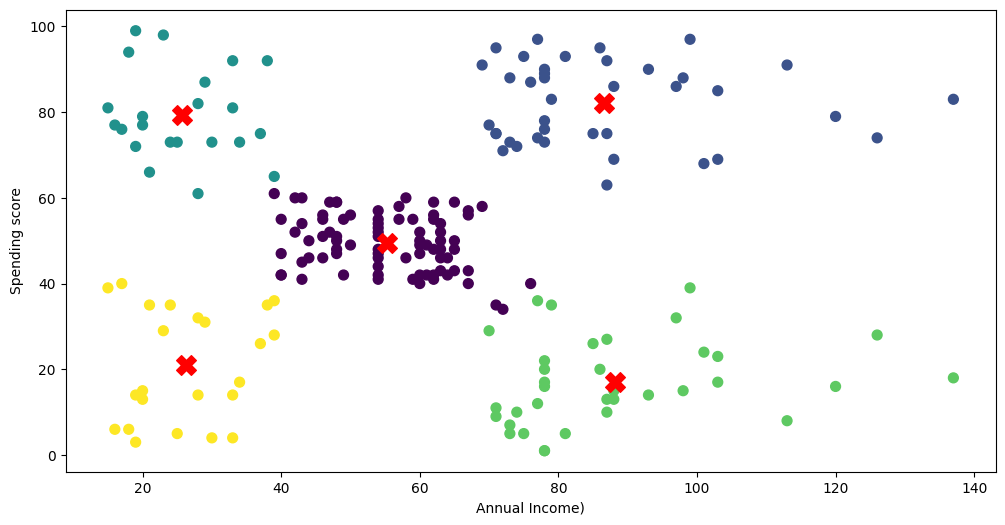

In [ ]:
# Visualize kết quả phân cụm trên dữ liệu gốc (chưa chuẩn hóa)
plt.figure(figsize=(12,6))

# Vẽ các điểm dữ liệu gốc với màu sắc theo cụm đã tìm được
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', marker='o', s=50)

# Chuyển centroid từ không gian chuẩn hóa về không gian gốc
# inverse_transform: thao tác ngược lại với fit_transform
unscaled_centers = scaler.inverse_transform(centers)
plt.scatter(unscaled_centers[:, 0], unscaled_centers[:, 1], c='red', marker='X', s=200)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering Results (Original Scale)')
plt.show()

In [ ]:
# Định nghĩa hàm thực hiện K-means và visualize kết quả
# Mục đích: tái sử dụng code cho nhiều giá trị k khác nhau
def my_kmeans(X_scaled, n_clusters=5, random_state=42):
    # Thực hiện K-means với số cụm được chỉ định
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(X_scaled)
    
    # In ra inertia để đánh giá chất lượng phân cụm
    inertia = kmeans.inertia_
    print(f"Inertia: {inertia}")
    
    # Lấy nhãn cụm và centroid
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    # Vẽ biểu đồ kết quả trên scale gốc để dễ hiểu
    plt.figure(figsize=(12,6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', marker='o', s=50)
    
    # Chuyển centroid về scale gốc để vẽ
    unscaled_centers = scaler.inverse_transform(centers)
    plt.scatter(unscaled_centers[:, 0], unscaled_centers[:, 1], c='red', marker='X', s=200)
    
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.title(f'K-means with {n_clusters} clusters')
    plt.show()

Inertia: 30.05932269404221


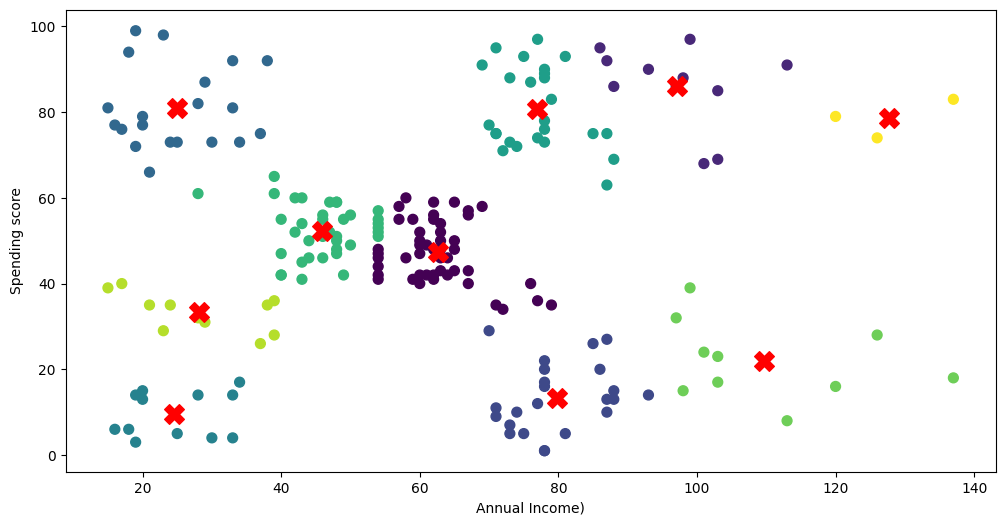

In [ ]:
# Thử nghiệm hàm my_kmeans với 10 cụm
# So sánh với k=5 để thấy sự khác biệt
# k=10 có thể tạo ra quá nhiều cụm (overfitting)
my_kmeans(X_scaled, n_clusters=10)

In [ ]:
# Tính inertia cho các giá trị k từ 2 đến 10
# Mục đích: tìm giá trị k tối ưu bằng phương pháp Elbow
# k từ 2-10: phạm vi hợp lý để tránh underfitting (k quá nhỏ) và overfitting (k quá lớn)
k_list = range(2, 11)
inertia_list = []

for k in k_list:
    # Thực hiện K-means cho mỗi giá trị k
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    # Lưu inertia để vẽ đồ thị Elbow
    inertia_list.append(kmeans.inertia_)

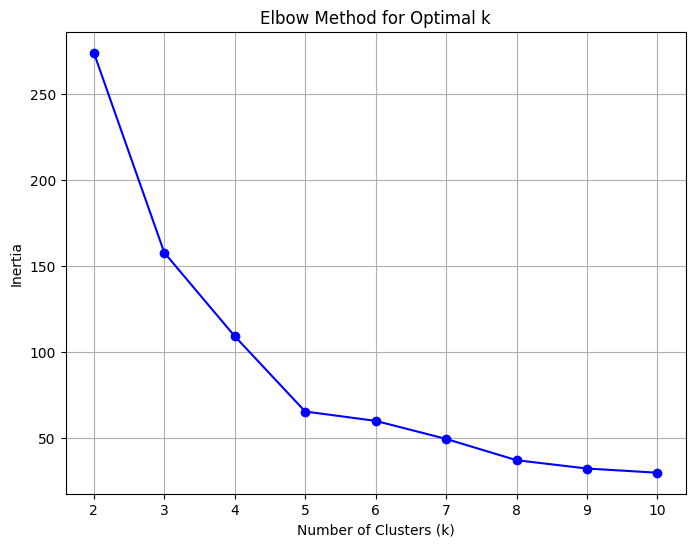

In [ ]:
# Vẽ biểu đồ Elbow Method để tìm k tối ưu
# Phương pháp Elbow: tìm điểm "khuỷu tay" trên đồ thị k vs inertia
# Điểm elbow là nơi inertia giảm chậm lại, cho thấy k tối ưu
plt.figure(figsize=(8, 6))
plt.plot(k_list, inertia_list, 'bo-')  # 'bo-': điểm tròn xanh nối bằng đường thẳng
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()  # hiển thị lưới để dễ đọc
plt.show()

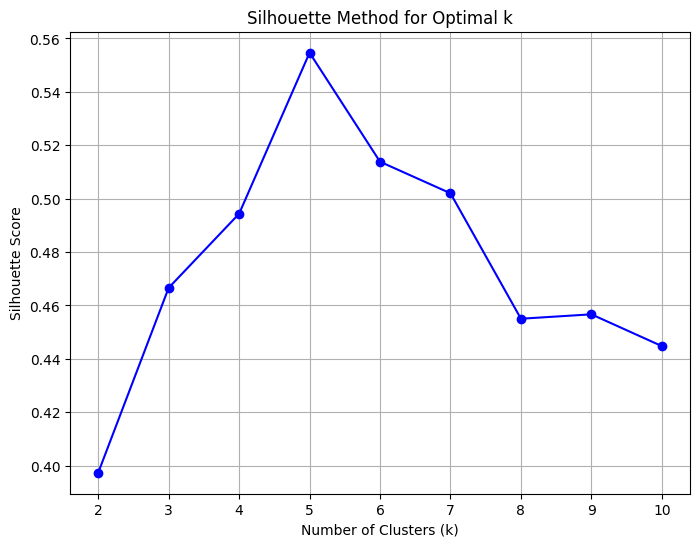

In [ ]:
# Phương pháp Silhouette để tìm k tối ưu
# Silhouette Score: đo độ tách biệt giữa các cụm (-1 đến 1)
# Score càng cao thì phân cụm càng tốt (điểm gần với cụm của nó, xa cụm khác)
from sklearn.metrics import silhouette_score

k_list = range(2, 11)
silhouette_avg_list = []

for k in k_list:
    # Thực hiện K-means cho mỗi giá trị k
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    
    # Tính Silhouette score trung bình cho tất cả các điểm
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_avg_list.append(silhouette_avg)

# Vẽ biểu đồ Silhouette Score vs k
# Chọn k có Silhouette Score cao nhất
plt.figure(figsize=(8, 6))
plt.plot(k_list, silhouette_avg_list, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.grid()
plt.show()

In [ ]:
# Chuyển sang dataset Wine để demo thêm
# Wine dataset: dữ liệu phân loại rượu với 13 đặc trưng hóa học
# Có 3 class rượu khác nhau (ground truth để so sánh)
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data  # 13 đặc trưng hóa học
y = wine.target  # 3 nhãn class thực tế (0, 1, 2)
print(f"Shape của dữ liệu: {X.shape}")  # (178 samples, 13 features)

(178, 13)


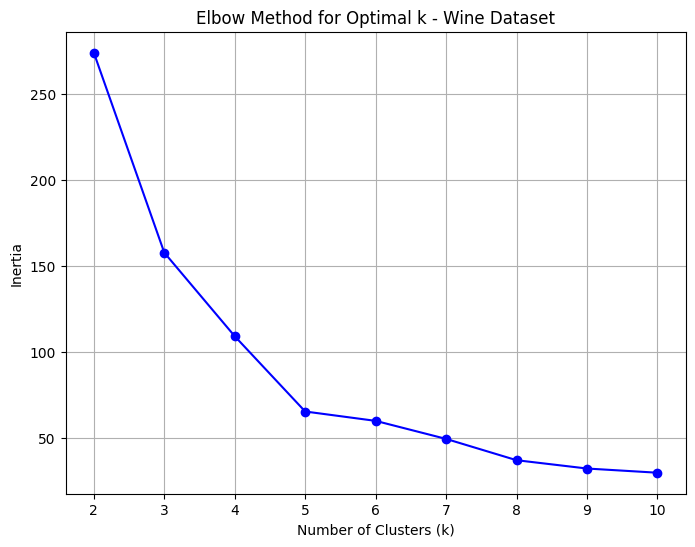

K tối ưu theo Elbow method: k = 7
Inertia tương ứng: 32.50


In [71]:
# Ví dụ hoàn chỉnh: Tìm k tối ưu cho Wine dataset
# Tắt cảnh báo để output sạch hơn
import warnings
warnings.filterwarnings('ignore')

# 1. Chuẩn hóa dữ liệu Wine (13 đặc trưng)
# Wine có các đặc trưng với scale rất khác nhau (VD: alcohol ~14, acid ~0.3)
# Chuẩn hóa giúp K-means hoạt động chính xác hơn
X_scaled = StandardScaler().fit_transform(X)

# 2. Thiết lập vòng lặp để thử các giá trị k
# k từ 2-9: phạm vi hợp lý (biết trước có 3 class thực tế)
k_list = range(2, 11)
inertia_list = []        # Lưu inertia cho Elbow method
silhouette_avg_list = [] # Lưu Silhouette score cho Silhouette method

# 2.1 Thực hiện phân cụm và đánh giá cho mỗi k
for k in k_list:
    # Phân cụm với k cụm
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    
    # Tính Silhouette score (đo chất lượng phân cụm)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_avg_list.append(silhouette_avg)
    
    # Lưu inertia (tổng khoảng cách bình phương đến centroid)
    inertia_list.append(kmeans.inertia_)

# 3. Vẽ biểu đồ Elbow Method
# Tìm điểm "khuỷu tay" - nơi inertia giảm chậm lại
plt.figure(figsize=(8, 6))
plt.plot(k_list, inertia_list, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k - Wine Dataset')
plt.grid()
plt.show()

# 4. Tìm k tối ưu bằng phương pháp toán học
# Tính đạo hàm bậc nhất (slope) và bậc hai để tìm elbow
import numpy as np
slopes = np.diff(inertia_list)           # Đạo hàm bậc nhất (tính độ dốc của các inertia)
slopes_deriv = np.diff(slopes)           # Đạo hàm bậc hai (tính độ dốc của độ dốc)
k_optimal = np.argmin(slopes_deriv) + 2 + 2 # +2 vì đạo hàm 2 lần, + 2 vì k bắt đầu từ 2


# In kết quả k tối ưu và inertia tương ứng
inertia_optimal = inertia_list[k_optimal] 
print(f'K tối ưu theo Elbow method: k = {k_optimal}')
print(f'Inertia tương ứng: {inertia_optimal:.2f}')

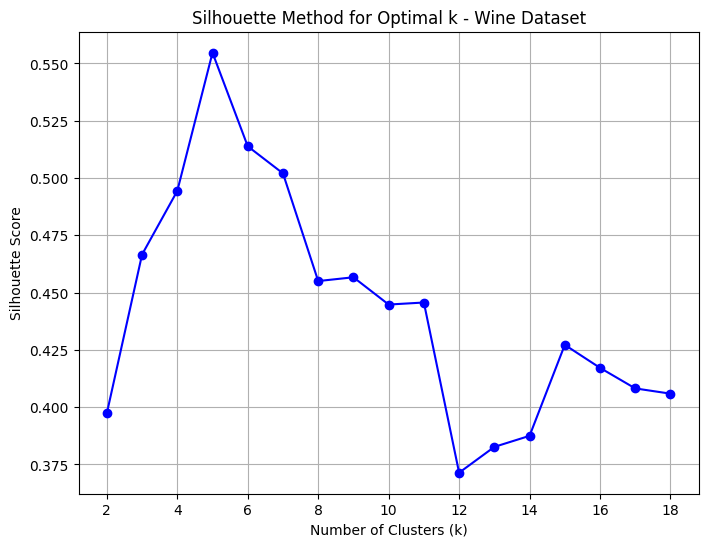

K tối ưu theo Silhouette method: k = 5
Silhouette Score tương ứng: 0.555


In [65]:
# Vẽ biểu đồ Silhouette Score để xác nhận k tối ưu
# Silhouette Score cao nhất cho thấy k tối ưu
plt.figure(figsize=(8, 6))
plt.plot(k_list, silhouette_avg_list, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k - Wine Dataset')
plt.grid()
plt.show()

# Tìm k có Silhouette Score cao nhất
max_silhouette_idx = np.argmax(silhouette_avg_list)
k_silhouette_optimal = k_list[max_silhouette_idx]
max_silhouette_score = silhouette_avg_list[max_silhouette_idx]

print(f'K tối ưu theo Silhouette method: k = {k_silhouette_optimal}')
print(f'Silhouette Score tương ứng: {max_silhouette_score:.3f}')